<a href="https://colab.research.google.com/github/RXX17/Image-Processing/blob/main/OsteoEfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input

In [4]:
# Image size and loading datasets
IMAGE_SIZE = [600, 600, 3]

train_path = '/content/drive/MyDrive/Split/train'
valid_path = '/content/drive/MyDrive/Split/val'

In [5]:
efficientnet = EfficientNetB7(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

258076736/258076736 [==============================] - 9s 0us/step


In [6]:
# don't train existing weights
for layer in efficientnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Split/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(efficientnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=efficientnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 600, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 600, 600, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 600, 600, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 600, 600, 3)  0           ['normalization[0][0]']      

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Split/train',
                                                 target_size = (600, 600),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 913 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Split/val',
                                            target_size = (600, 600),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 231 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-15-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
29/29 [==============================] - 579s 19s/step - loss: 155.6342 - accuracy: 0.3461 - val_loss: 147.3937 - val_accuracy: 0.2294
Epoch 2/50
29/29 [==============================] - 118s 4s/step - loss: 50.2240 - accuracy: 0.3560 - val_loss: 48.8543 - val_accuracy: 0.2294
Epoch 3/50
29/29 [==============================] - 121s 4s/step - loss: 56.0617 - accuracy: 0.3373 - val_loss: 35.6780 - val_accuracy: 0.4632
Epoch 4/50
29/29 [==============================] - 121s 4s/step - loss: 47.8425 - accuracy: 0.3363 - val_loss: 42.9165 - val_accuracy: 0.4675
Epoch 5/50
29/29 [==============================] - 119s 4s/step - loss: 61.4604 - accuracy: 0.3604 - val_loss: 81.0589 - val_accuracy: 0.5844
Epoch 6/50
29/29 [==============================] - 120s 4s/step - loss: 72.6504 - accuracy: 0.3921 - val_loss: 59.8332 - val_accuracy: 0.2294
Epoch 7/50
29/29 [==============================] - 119s 4s/step - loss: 58.2346 - accuracy: 0.3242 - val_loss: 39.7390 - val_accuracy: 0.2

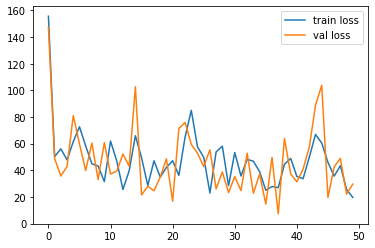

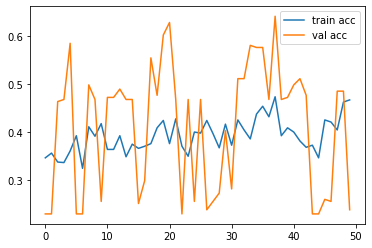

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')